# Microsoft Movie Studio Analysis

**Authors:** Joseph Ngige
***

## Overview
***
Microsoft's new movie studio aims to identify the most successful movie genres at the box office. By analyzing data from [IMDb website](https://www.imdb.com/) and [Box Office Mojo](https://www.boxofficemojo.com/) websites, I determined that Action, Adventure, and Sci-Fi combinations consistently achieve the highest domestic and foreign gross revenues, as well as the most votes. Adventure, in particular, is a common element in top-performing genres. Therefore, I would recommend focusing on Action, Adventure, and Sci-Fi movies, and also suggest considering Adventure paired with Animation or Fantasy. Additionally, the combination of Adventure, Animation, and Comedy shows strong potential for financial success.
***

## Business Problem
***
Microsoft sees all the big companies creating original video content and wants to get in on the fun by creating a new movie studio. However, they lack experience in making movies. They would therefore want to explore which types of movies are currently the most successful at the box office and translating those findings into actionable insights for their new movie studio. To determine the most profitable movie genres, both domestic and foreign sales data for top movie genres was analyzed, as well as the average ratings and number of votes for each genre, to compare their popularity with financial success.
***

## Data Understanding
***
The data analyzed came from an SQLite database and a CSV file sourced from IMDb and Box Office Mojo websites, respectively. IMDb is a widely-used database for movies, TV shows, video games, and streaming content, while Box Office Mojo tracks global box office revenue, including domestic and international grosses. Using the movie_basics and movie_ratings tables from the IMDb database and the CSV data from Box Office Mojo, I focused on determining the most successful genres by analyzing domestic and foreign gross sales, average ratings, and number of votes.

In [1]:
# Import standard packages
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load the IMDB Database

First, load the IMDB SQLite database and inspect the relevant tables (movie_basics and movie_ratings).

In [2]:
# Connect to the SQLite database
conn = sqlite3.connect('data/im.db')
# Initialize a cursor
cursor = conn.cursor()

In [3]:
# List the tables in the SQLite database
tables_query = "SELECT name AS 'Table Names' FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(tables_query, conn)
tables

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [4]:
# Load the relevant tables, movie_basics and movie_ratings tables
df_movie_basics = pd.read_sql_query("SELECT * FROM movie_basics;", conn)
df_movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings;", conn)

In [5]:
# Display the first few rows of movie_basics table
df_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
# Check the movie_basics dataframe information
df_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [7]:
# Display the first few rows of movie_ratings table
df_movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [8]:
# Check the movie_ratings dataframe information
df_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [9]:
# Close the SQLite database connection
conn.close()

### Load the Box Office Mojo Data

Next, load the Box Office Mojo CSV file and inspect its structure.

In [10]:
# Load the Box Office Mojo CSV file and display the first few rows
df_bom_movie = pd.read_csv('data/bom.movie_gross.csv')
df_bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [11]:
# Check the df_bom_movie dataset information
df_bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


### Initial Data Insights

IMDB Tables (movie_basics and movie_ratings):

* These tables provide information on movie titles, genres, release years, runtime, and ratings.
* The movie_id can be used to join these tables for combined insights.
* The movie_basics table has some missing values.

Box Office Mojo Data:

* This table provides box office performance data, including domestic and international earnings.
* The box office data has some missing values.
***

## Data Preparation
***
After obtaining initial data insights, I cleaned the data to ensure integrity by addressing missing values. Critical columns like movie_basics and movie_ratings were cleaned by removing rows with missing data, and financial figures were imputed with zeros where appropriate. Data types were standardized for accurate analysis, and financial figures were normalized to millions for readability. I then merged the datasets using common attributes, such as movie titles and IDs, to create a unified dataset containing all essential information. Non-essential columns, such as "studio" and "original_title," were dropped to streamline the dataset.

### Data Cleaning

#### Movie Basics Data

In [12]:
# Check for missing values in movie_basics
missing_values_basics = df_movie_basics.isnull().sum()
missing_values_basics

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

There are missing values in the movie_basics table:

* **original_title**: Some missing row values (21).
* **runtime_minutes**: A significant number of missing row values (31,739).
* **genres**: Some missing row values (5,408).

In [13]:
# Cleaning Movie Basics data
# Drop the original_title column as it is not needed for the analysis
movie_basics_clean = df_movie_basics.drop(columns=['original_title'])

# Fill missing runtime_minutes with 0
movie_basics_clean['runtime_minutes'] = movie_basics_clean['runtime_minutes'].fillna(0)

# Drop rows with missing genres as they are critical for the analysis
movie_basics_clean = movie_basics_clean.dropna(subset=['genres'])

# Convert data types
movie_basics_clean['start_year'] = movie_basics_clean['start_year'].astype(int)
movie_basics_clean['runtime_minutes'] = movie_basics_clean['runtime_minutes'].astype(int)

movie_basics_clean

,movie_id,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122,Drama
3,tt0069204,Sabse Bada Sukh,2018,0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
146138,tt9916428,The Secret of China,2019,0,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,2019,123,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,0,Documentary
146141,tt9916706,Dankyavar Danka,2013,0,Comedy


In [14]:
# Checking Movie_Basics_Clean information
movie_basics_clean.info()

# Shows the cleaned data has no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   movie_id         140736 non-null  object
 1   primary_title    140736 non-null  object
 2   start_year       140736 non-null  int32 
 3   runtime_minutes  140736 non-null  int32 
 4   genres           140736 non-null  object
dtypes: int32(2), object(3)
memory usage: 5.4+ MB


##### Comments on Movie Basics Data Cleaning

* **original_title**: Dropped the column since it is not critical for the analysis focused on understanding successful film types at the box office.
* **runtime_minutes**: Filled missing values with 0. This maintains numerical consistency and allows us to keep the records. While not entirely realistic, this approach ensures that the analysis is not disrupted by missing runtime data.
* **genres**: Dropped rows with missing genres as they are critical for the analysis. Missing genre information would hinder the ability to categorize and analyze movies effectively.

#### Moving Ratings Data

In [15]:
# Check for missing values in movie_ratings
missing_values_ratings = df_movie_ratings.isnull().sum()
missing_values_ratings

movie_id         0
averagerating    0
numvotes         0
dtype: int64

##### Comments on Movie Ratings Data Cleaning
There are no missing values in the the movie ratings table and hence no need for further data cleaning.

#### Box Office Mojo Data

In [16]:
# Check for missing values in df_bom_movie data
missing_values_csv = df_bom_movie.isnull().sum()
missing_values_csv

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

There are missing row values in the Box Offfic Mojo data in the studio(5), domestic_gross(28) and foreign_gross(1350) columns.

In [17]:
# Drop rows with missing title and year as they are essential
bom_movie_clean = df_bom_movie.dropna(subset=['title', 'year'])

# Handle missing gross values
bom_movie_clean['domestic_gross'] = bom_movie_clean['domestic_gross'].fillna(0)
bom_movie_clean['foreign_gross'] = bom_movie_clean['foreign_gross'].fillna(0)

# Convert gross values to numeric
bom_movie_clean['domestic_gross'] = bom_movie_clean['domestic_gross'].astype(str).str.replace(',', '').astype(float)
bom_movie_clean['foreign_gross'] = bom_movie_clean['foreign_gross'].astype(str).str.replace(',', '').astype(float)
bom_movie_clean['year'] = bom_movie_clean['year'].astype(int)

# Drop the studio column if not needed
bom_movie_clean = bom_movie_clean.drop(columns=['studio'])

# Display bom_movie_clean data
bom_movie_clean

,title,domestic_gross,foreign_gross,year
0,Toy Story 3,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010
3,Inception,292600000.0,535700000.0,2010
4,Shrek Forever After,238700000.0,513900000.0,2010
...,...,...,...,...
3382,The Quake,6200.0,0.0,2018
3383,Edward II (2018 re-release),4800.0,0.0,2018
3384,El Pacto,2500.0,0.0,2018
3385,The Swan,2400.0,0.0,2018


In [18]:
bom_movie_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   domestic_gross  3387 non-null   float64
 2   foreign_gross   3387 non-null   float64
 3   year            3387 non-null   int32  
dtypes: float64(2), int32(1), object(1)
memory usage: 119.1+ KB


##### Comments on the Box Office Mojo Data Cleaning

* Studio had some missing values, which were not critical for the analysis.
* Domestic_gross and foreign_gross had some missing values, which were filled with 0 to maintain numerical consistency.
* Dropped rows with missing values for title and year, which are essential for identifying and merging data.

### Merge DataFrames

In [19]:
# Merge csv_data_clean with movie_basics_clean on title and year
merged_df1 = pd.merge(bom_movie_clean, movie_basics_clean, left_on=['title', 'year'], right_on=['primary_title', 'start_year'], how='inner')

# Merge the resulting dataframe with movie_ratings_clean on movie_id
final_merged_df = pd.merge(merged_df1, df_movie_ratings, on='movie_id', how='inner')

# Display the first few rows of merged dataframe
final_merged_df.head()

,title,domestic_gross,foreign_gross,year,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,2010,103,"Adventure,Animation,Comedy",8.3,682218
1,Inception,292600000.0,535700000.0,2010,tt1375666,Inception,2010,148,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,238700000.0,513900000.0,2010,tt0892791,Shrek Forever After,2010,93,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,300500000.0,398000000.0,2010,tt1325004,The Twilight Saga: Eclipse,2010,124,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,312400000.0,311500000.0,2010,tt1228705,Iron Man 2,2010,124,"Action,Adventure,Sci-Fi",7.0,657690


#### Converting Gross to Millions

Tidied up the "Domestic Gross' and 'Foreign Gross' columns and converted them to units of $ millions for easier readability and analysis.

In [20]:
# Convert 'domestic_gross' and 'foreign_gross' to millions
final_merged_df['domestic_gross'] = final_merged_df['domestic_gross'] /1e6
final_merged_df['foreign_gross'] = final_merged_df['foreign_gross'] /1e6

# Rename the columns for clarity
final_merged_df.rename(columns={'domestic_gross': 'domestic_gross_millions', 'foreign_gross': 'foreign_gross_millions'}, inplace=True)

# Display the updated dataframe
final_merged_df.head()

,title,domestic_gross_millions,foreign_gross_millions,year,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,415.0,652.0,2010,tt0435761,Toy Story 3,2010,103,"Adventure,Animation,Comedy",8.3,682218
1,Inception,292.6,535.7,2010,tt1375666,Inception,2010,148,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,238.7,513.9,2010,tt0892791,Shrek Forever After,2010,93,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,300.5,398.0,2010,tt1325004,The Twilight Saga: Eclipse,2010,124,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,312.4,311.5,2010,tt1228705,Iron Man 2,2010,124,"Action,Adventure,Sci-Fi",7.0,657690


## Data Analysis & Visualization
***
Descriptive statistics were calculated to provide a baseline understanding of the data. Visualizations, including bar charts, line plot, and scatter plot, were created to intuitively display the data and highlight trends and patterns. For instance, I used bar charts to identify top-performing genres by total domestic and foreign gross, while scatter plots helped visualize the correlation between average ratings, total votes, and financial success. The focus was on identifying high-performing genres, understanding the impact of ratings on financial performance, and exploring audience engagement metrics.

### Genre Financial Success

Analyzing the financial success of movies by genre to identify with genres generate higher returns; which genres appeal to different audience demographics and which mix of genres would constitute a well balanced moview portfolio. The results highlight the dominance of action and adventure genres, the significance of international markets, and the importance of understanding audience preferences.

In [22]:
# Analyze financial success by genres
genre_success = final_merged_df.explode('genres').groupby('genres').agg(
    total_domestic_gross=('domestic_gross_millions', 'sum'),
    total_foreign_gross=('foreign_gross_millions', 'sum'),
    average_rating=('averagerating', 'mean'),
    total_votes=('numvotes', 'sum'),
    average_runtime=('runtime_minutes', 'mean')
).reset_index()

genre_success

,genres,total_domestic_gross,total_foreign_gross,average_rating,total_votes,average_runtime
0,Action,18.123900,139.299999,6.500000,116449,120.444444
1,"Action,Adventure",0.112800,0.000000,5.400000,7790,126.500000
2,"Action,Adventure,Animation",2180.620000,4154.200000,7.352941,2688086,99.529412
3,"Action,Adventure,Biography",240.000000,446.700000,7.166667,763936,124.666667
4,"Action,Adventure,Comedy",3010.529499,5586.100000,6.365385,5212565,113.846154
...,...,...,...,...,...,...
256,"Romance,Sci-Fi,Thriller",62.500000,65.400000,7.100000,227616,106.000000
257,"Romance,Thriller",0.507000,13.000000,6.200000,27542,96.000000
258,Sci-Fi,0.078000,0.000000,5.900000,3501,89.000000
259,Thriller,55.553900,88.800000,6.060000,17828,101.200000


#### Genres by Domestic Gross

This analysis shows the total domestic gross for the top 10 genres, highlighting which genres are domestically most financially successful. The results shows that action and adventure genres, especially when combined with elements of sci-fi, comedy, or fantasy, are the most financially successful in the domestic market.

In [23]:
# Analyze statistics for the total domestic gross
genre_success['total_domestic_gross'].describe()

count      261.000000
mean       300.897360
std       1005.813180
min          0.001400
25%          2.300000
50%         44.300000
75%        240.000000
max      10967.599999
Name: total_domestic_gross, dtype: float64

In [24]:
# Sort genres by total domestic gross and select top 10 genres
genre_success_domestic = genre_success[['genres', 'total_domestic_gross']].sort_values(by='total_domestic_gross', ascending=False).head(10)
genre_success_domestic

,genres,total_domestic_gross
11,"Action,Adventure,Sci-Fi",10967.599999
67,"Adventure,Animation,Comedy",9612.906698
8,"Action,Adventure,Fantasy",4285.687000
4,"Action,Adventure,Comedy",3010.529499
133,Comedy,2263.796499
2,"Action,Adventure,Animation",2180.620000
23,"Action,Comedy,Crime",1809.021000
12,"Action,Adventure,Thriller",1746.498000
168,"Comedy,Romance",1722.130000
6,"Action,Adventure,Drama",1701.097000


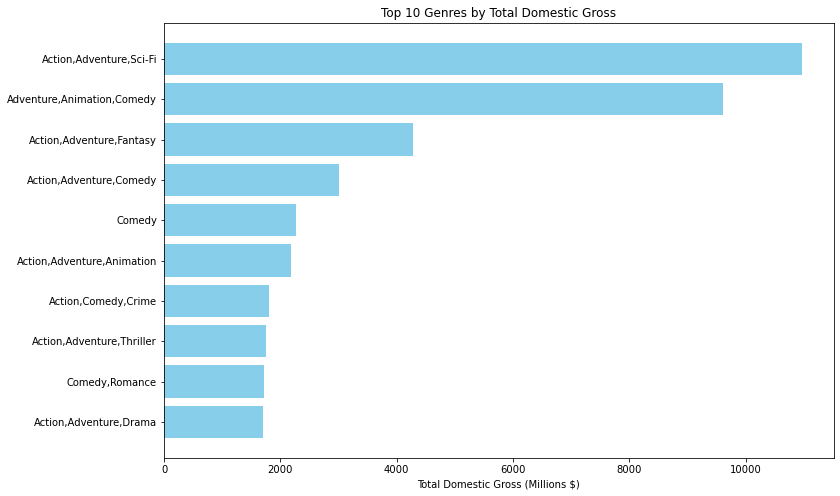

In [25]:
# Plotting the results by Total Domestic Gross for Top 10 Genres
plt.figure(figsize=(12, 8))
plt.barh(genre_success_domestic['genres'], genre_success_domestic['total_domestic_gross'], color='skyblue')
plt.xlabel('Total Domestic Gross (Millions $)')
plt.title('Top 10 Genres by Total Domestic Gross')
plt.gca().invert_yaxis()  # To display the highest grossing genre at the top